In [1]:
# Importamos las librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Cargamos el dataset

df_diabetes = pd.read_csv('/content/pima-indians-diabetes.csv', sep = ',')
df_diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


### Analisis exploratorio de datos

In [12]:
df_diabetes.sample(10)

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
164,6,104,74,18,156,29.9,0.722,41,1
30,3,158,76,36,245,31.6,0.851,28,1
495,5,110,68,0,0,26.0,0.292,30,0
344,8,126,88,36,108,38.5,0.349,49,0
550,3,84,68,30,106,31.9,0.591,25,0
505,0,180,90,26,90,36.5,0.314,35,1
623,2,108,64,0,0,30.8,0.158,21,0
55,7,187,68,39,304,37.7,0.254,41,1
97,6,93,50,30,64,28.7,0.356,23,0
748,6,162,62,0,0,24.3,0.178,50,1


In [11]:
# Cambiamos el nombre de las columnas

df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']


In [14]:
df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


En este conjunto de datos hay 8 caracteristicas de entrada y 1 caracteristica de salida  / destio / target

El significado de los nombres de las caracteristicas es el siguiente

- Numero de embarazos
- Concentracion de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa
- Presion arterial diastolica (mm Hg)
- Espesor de pliegue cutaneo del triceps (mm)
Insulina serica de 2 horas (mu U/ml)
- Indice de masa corporal (peso en kg / (altura en m) **2
- Funcion del pedigri de la diabetes
- Edad (anos)
- Variable de clase (0 a 1)



In [15]:
# Analizamos el shape del objeto

df_diabetes.shape


(767, 9)

In [16]:
# Visualizamos los tipos de datos

df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

### Entrenamiento de random forest con scikit-learn

In [17]:
# Separamos en X en y

X = df_diabetes.drop('9. Class variable (0 or 1)', axis =1)
y = df_diabetes['9. Class variable (0 or 1)']

In [18]:
# Importamos librerias necesarias para la crewacion del modelo

from sklearn.model_selection import train_test_split

# 30 % para test y 70% para train

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 00000)

In [19]:
# Arbol de decision

from sklearn.ensemble import RandomForestClassifier

# Creacion de modelo

random_forest = RandomForestClassifier(n_estimators=10, random_state= 00000)

In [20]:
# Entrenamiento del modelo

random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [21]:
# Calculo de las prediciones de Train y Test

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

### Evaluacion del modelo

In [22]:
# Calculo de las metricas

from sklearn.metrics import accuracy_score

# Calculo el accuracy en train

train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculo del accuracy en Test

test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es:', train_accuracy)
print('El accuracy en test es:', test_accuracy)



El accuracy en train es: 0.9850746268656716
El accuracy en test es: 0.7445887445887446


In [24]:
# Verificamos el feature impportances

feature_importances_df = pd.DataFrame(
    {'feature': list(X.columns), 'importance': random_forest.feature_importances_}).sort_values('importance', ascending = False)

# Mostrar

feature_importances_df


,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.205740
5,6. Body mass index (weight in kg/(height in m)^2),0.193899
7,8. Age (years),0.129633
6,7. Diabetes pedigree function,0.126973
0,1. Number of times pregnant,0.096289
2,3. Diastolic blood pressure (mm Hg),0.086302
3,4. Triceps skin fold thickness (mm),0.081293
4,5. 2-Hour serum insulin (mu U/ml),0.079870


Esto nos indica las variables mas significativas

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test'),
  Text(1, 0, '6. Body mass index (weight in kg/(height in m)^2)'),
  Text(2, 0, '8. Age (years)'),
  Text(3, 0, '7. Diabetes pedigree function'),
  Text(4, 0, '1. Number of times pregnant'),
  Text(5, 0, '3. Diastolic blood pressure (mm Hg)'),
  Text(6, 0, '4. Triceps skin fold thickness (mm)'),
  Text(7, 0, '5. 2-Hour serum insulin (mu U/ml)')])

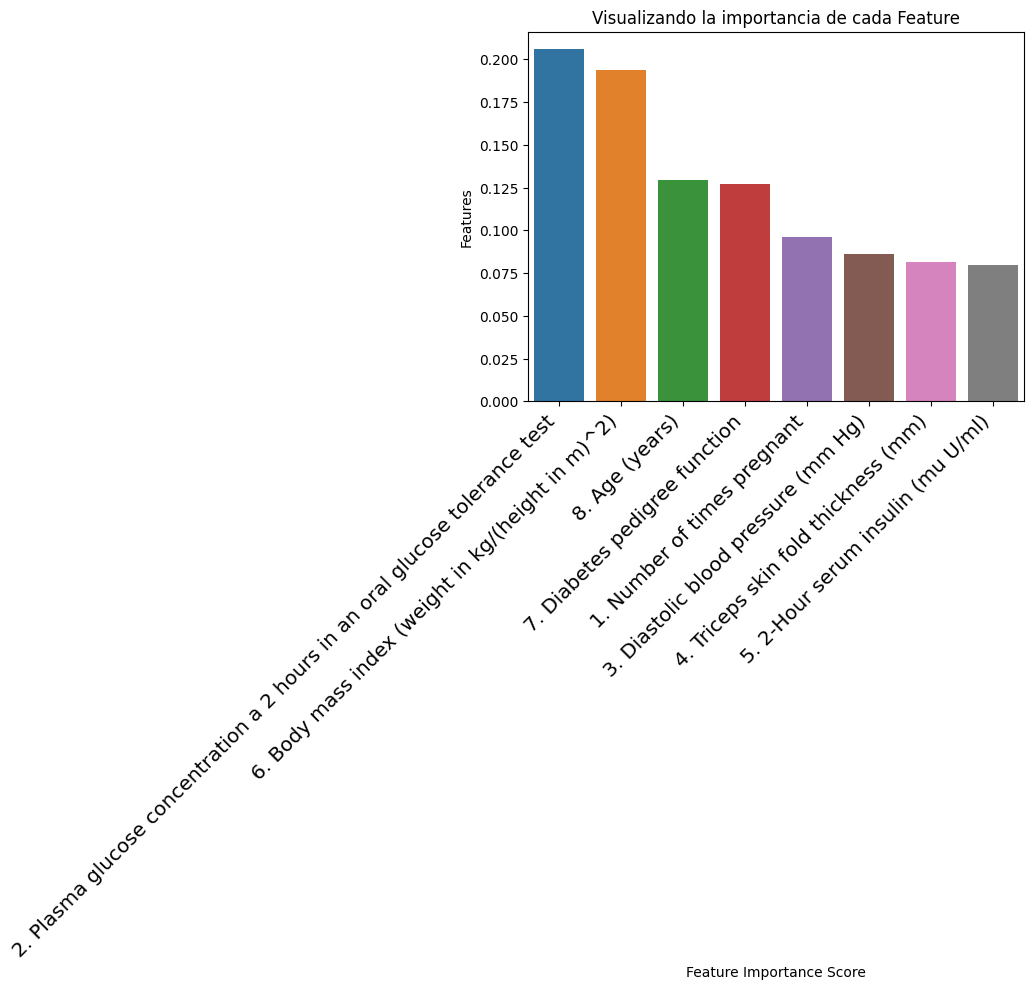

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = feature_importances_df.feature  , y= feature_importances_df.importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizando la importancia de cada Feature')
plt.xticks(rotation=45, horizontalalignment = 'right', fontweight = 'light', fontsize ='x-large')
